In [1]:
import sys

sys.path.insert(1, "/home/vinicius/Documentos/StuartLandauWBM/")

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
import scipy
import xarray as xr
from frites.core import copnorm_nd, gccmi_nd_ccc, gcmi_1d_cc, gcmi_nd_cc
from hoi.core import get_mi
from plot import circular_hist
from tqdm import tqdm

from src.models import simulate_hopf

/home/vinicius/anaconda3/envs/test_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
jax.config.update("jax_enable_x64", True)
jax.config.update("jax_platform_name", "cpu")

####

In [4]:
C = np.array([[0, 1], [0, 0]]).T

In [5]:
decim = 15
fsamp = 1 / 1e-4
beta = 1e-4
f = 40
a = -5

In [6]:
simulate_hopf?

Signature:
simulate_hopf(
    A: numpy.ndarray,
    g: float,
    f: float,
    a: float,
    fs: float,
    eta: float,
    T: float,
    seed: int = 0,
    device: str = 'cpu',
    decim: int = 1,
)
Docstring: <no docstring>
File:      ~/Documentos/StuartLandauWBM/src/models.py
Type:      function

In [7]:
simulate_jax = jax.vmap(
    simulate_hopf,
    in_axes=(None, 0, None, 0, None, None, None, 0, None, None),
)

In [8]:
g = jnp.linspace(0, 5, 20)
a = jnp.linspace(-10, 0, 30)

In [9]:
params = jnp.array(jnp.meshgrid(g, a)).T.reshape(-1, 2)

In [10]:
time = np.arange(0, 10, 1 / fsamp)
Npoints = len(time)
seeds = jnp.arange(len(params))
dtheta = []
amp = []
for g, a in tqdm(params):

    x = simulate_hopf(
        C,
        1,
        f,
        float(a),
        fsamp,
        float(g),
        Npoints,
        0,
        "cpu",
        decim,
    )[..., 2000:]

    dtheta += [jnp.unwrap(jnp.angle(x[0] * jnp.conj(x[1]))).std()]
    amp += [jnp.abs(x[0] * jnp.conj(x[1])).std()]

100%|██████████████████████████████████████████████████████| 600/600 [05:47<00:00,  1.73it/s]


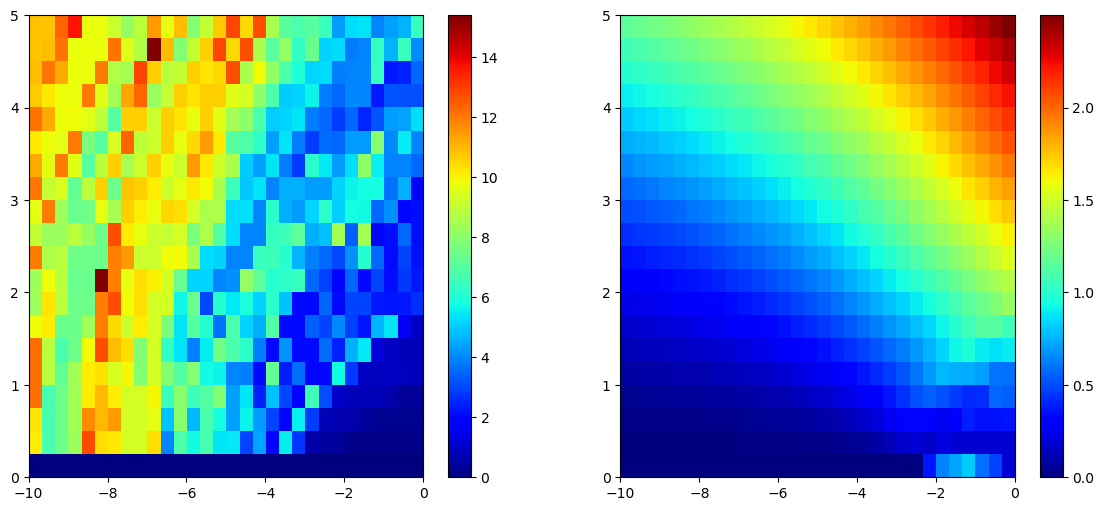

In [13]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.imshow(
    jnp.stack(dtheta).reshape(20, 30),
    aspect="auto",
    cmap="jet",
    origin="lower",
    vmin=0,
    extent=[-10, 0, 0, 5],
)
plt.colorbar()

plt.subplot(122)

plt.imshow(
    jnp.stack(amp).reshape(20, 30),
    aspect="auto",
    cmap="jet",
    origin="lower",
    vmin=0,
    extent=[-10, 0, 0, 5],
)
plt.colorbar()

In [ ]:
    x = simulate_hopf(
        C,
        1,
        f,
        float(a),
        fsamp,
        float(g),
        Npoints,
        0,
        "cpu",
        decim,
    )[..., 2000:]

In [ ]:
x = simulate_hopf(
    C,
    1,
    f,
    float(a),
    fsamp,
    float(g),
    Npoints,
    0,
    "cpu",
    decim,
)[..., 2000:]

In [ ]:
plt.plot(x[0].real)
plt.plot(x[1].real)